In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

In [8]:
# Download the Tesla data

tsla = yf.download('TSLA')
print(tsla.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          TSLA      TSLA      TSLA      TSLA       TSLA
Date                                                         
2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [9]:
tsla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [10]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3727 entries, 2010-06-29 to 2025-04-22
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   3727 non-null   float64
 1   (High, TSLA)    3727 non-null   float64
 2   (Low, TSLA)     3727 non-null   float64
 3   (Open, TSLA)    3727 non-null   float64
 4   (Volume, TSLA)  3727 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 174.7 KB


<Axes: title={'center': 'Tesla High Price'}, xlabel='Date'>

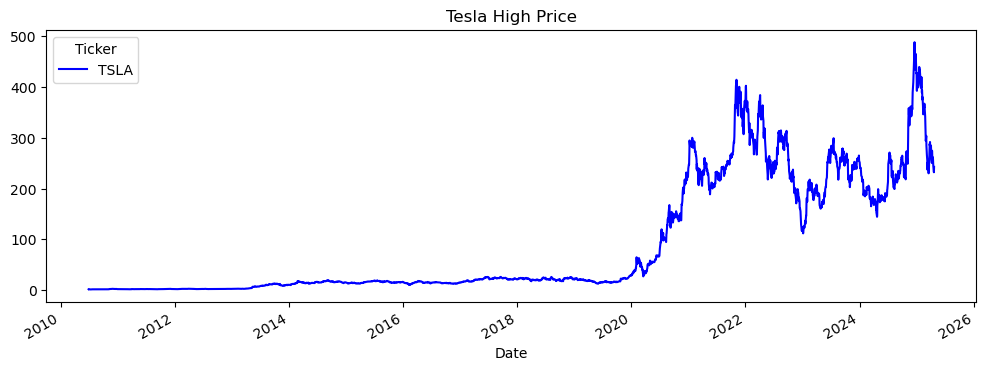

In [14]:
tsla['High'].plot(figsize=(12, 4), title='Tesla High Price', color='blue')

<Axes: title={'center': 'Tesla High Price'}, xlabel='Date'>

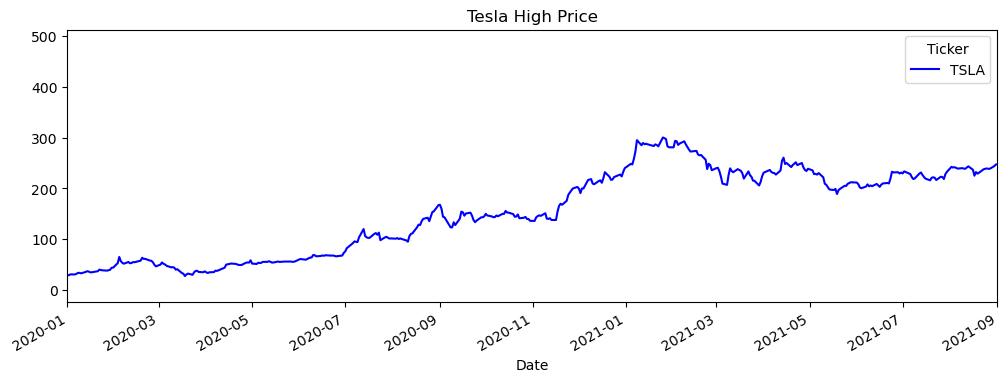

In [19]:
# Xlimt and ylimit 

tsla['High'].plot(figsize=(12, 4), title='Tesla High Price', color='blue', xlim=('2020-01-01', '2021-09-01'))


<Axes: title={'center': 'Tesla High Price'}, xlabel='Date'>

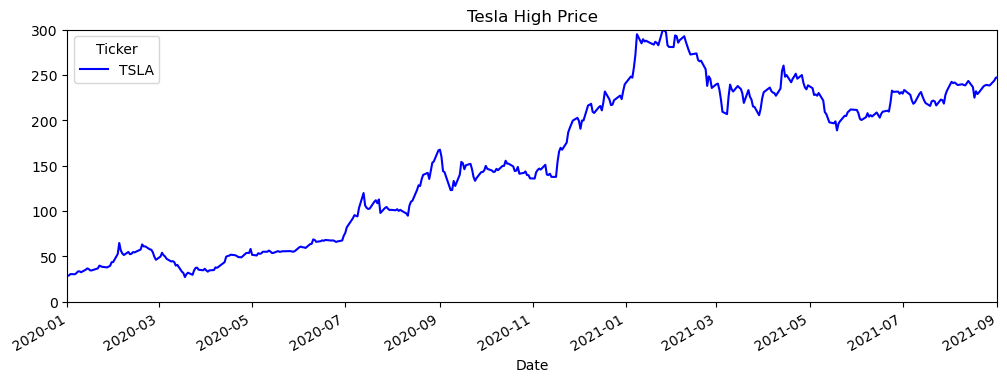

In [21]:
tsla['High'].plot(figsize=(12, 4), title='Tesla High Price', color='blue', xlim=('2020-01-01', '2021-09-01'), ylim=(0, 300))

<Axes: title={'center': 'Tesla High Price'}, xlabel='Date'>

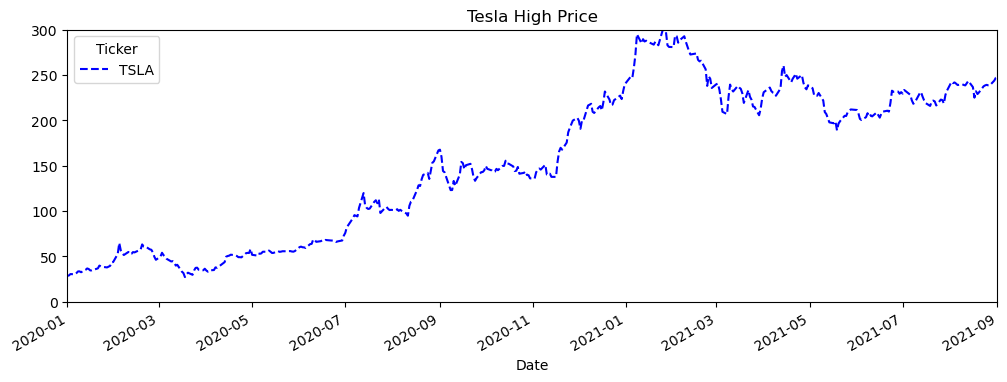

In [22]:
tsla['High'].plot(figsize=(12, 4), title='Tesla High Price', color='blue', xlim=('2020-01-01', '2021-09-01'), ylim=(0, 300), ls = '--')

In [23]:
index = tsla.loc['2020-01-01':'2021-09-01'].index
share_open = tsla.loc['2020-01-01':'2021-09-01']['Open']

In [27]:
share_open

Ticker,TSLA
Date,
2020-01-02,28.299999
2020-01-03,29.366667
2020-01-06,29.364668
2020-01-07,30.760000
2020-01-08,31.580000
...,...
2021-08-26,236.103333
2021-08-27,235.000000
2021-08-30,238.240005


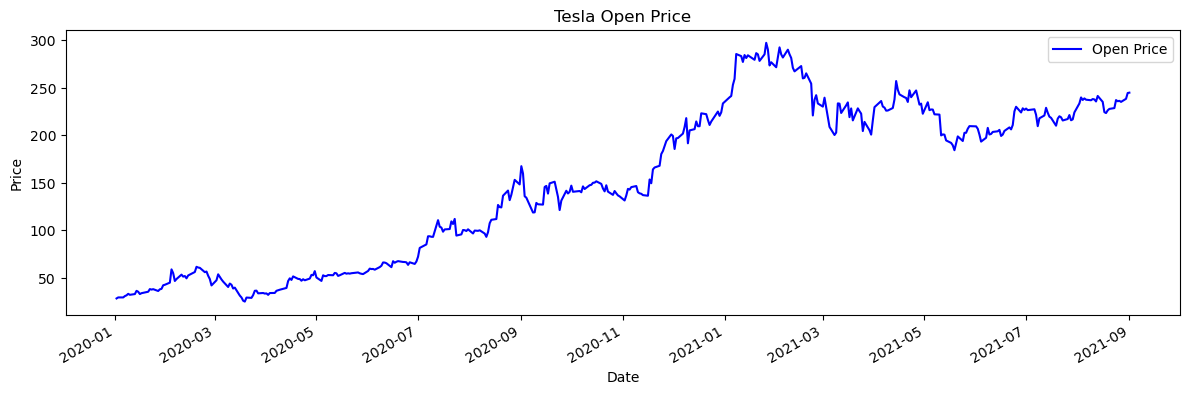

In [ ]:
figure, ax = plt.subplots(figsize=(12, 4))
ax.plot(index, share_open, color='blue', label='Open Price')
ax.set_title('Tesla Open Price')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.tight_layout()
# Prevent overlapping of x_axis labels
figure.autofmt_xdate()


In [28]:
# Date Time index

tsla = tsla.reset_index()

In [29]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727 entries, 0 to 3726
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        3727 non-null   datetime64[ns]
 1   (Close, TSLA)   3727 non-null   float64       
 2   (High, TSLA)    3727 non-null   float64       
 3   (Low, TSLA)     3727 non-null   float64       
 4   (Open, TSLA)    3727 non-null   float64       
 5   (Volume, TSLA)  3727 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 174.8 KB


In [30]:
tsla.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [31]:
# Using datetime

datetime(2021, 11, 21)

datetime.datetime(2021, 11, 21, 0, 0)

In [32]:
datetime.now()

datetime.datetime(2025, 4, 23, 11, 5, 31, 424927)

In [33]:
date = datetime.now()

In [35]:
date.date()

datetime.date(2025, 4, 23)

In [36]:
date.year

2025

In [37]:
date.month

4

In [38]:
date.day

23

In [39]:
date.weekday()

2

# Date Resampling 

In [41]:
tsla = tsla.set_index('Date')

tsla.resample(rule = 'A').min()

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_10538/348465614.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  tsla.resample(rule = 'A').min()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-12-31,1.053333,1.108667,0.998667,1.076000,1777500
2011-12-31,1.455333,1.484667,1.407333,1.452000,3594000
2012-12-31,1.519333,1.790000,1.509333,1.774667,5473500
2013-12-31,2.194000,2.225333,2.140667,2.205333,6603000
2014-12-31,9.289333,9.800000,9.111333,9.366667,19983000
2015-12-31,12.333333,12.619333,12.093333,12.388667,10620000
2016-12-31,9.578000,10.331333,9.403333,9.488000,24892500
2017-12-31,14.466000,14.688667,14.064000,14.316667,32800500


In [42]:
tsla.resample(rule= 'A').max()

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_10538/3463357436.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  tsla.resample(rule= 'A').max()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-12-31,2.364667,2.428000,2.316667,2.391333,281494500
2011-12-31,2.329333,2.333333,2.268667,2.308667,172767000
2012-12-31,2.534000,2.663333,2.474000,2.546000,85206000
2013-12-31,12.891333,12.966667,12.558000,12.930667,557458500
2014-12-31,19.069332,19.427999,18.693333,19.177999,490225500
2015-12-31,18.817333,19.110001,18.420000,18.680000,234744000
2016-12-31,17.694668,17.955999,16.967333,17.763332,356136000
2017-12-31,25.666668,25.974001,25.290001,25.779333,296871000


/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_10538/934805502.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  tsla.resample(rule= 'A').max()['Open'].plot()


<Axes: xlabel='Date'>

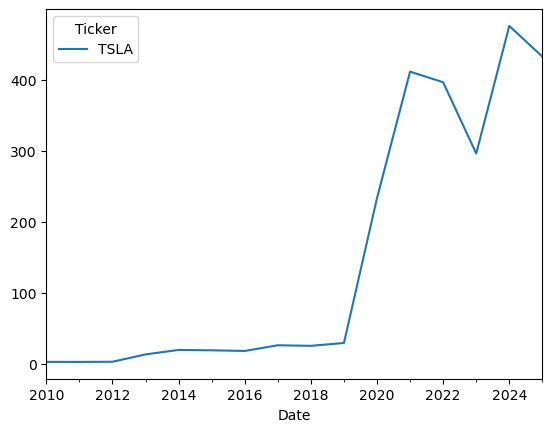

In [ ]:
# year and frequency mention 'A'

tsla.resample(rule= 'A').max()['Open'].plot()

<Axes: xlabel='Date'>

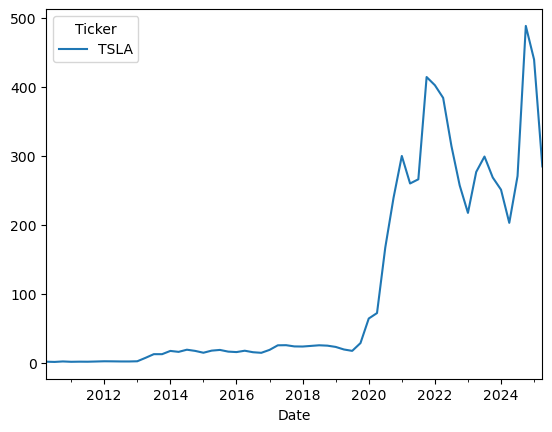

In [46]:
# Quartely

tsla.resample(rule= 'QS').max()['High'].plot()

<Axes: xlabel='Date'>

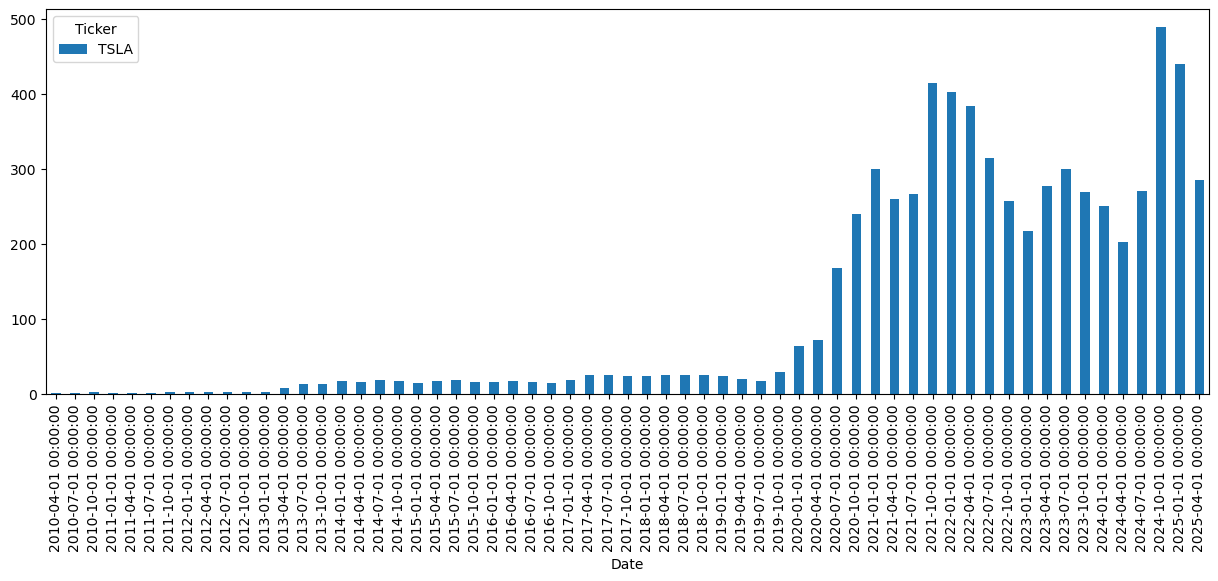

In [48]:
tsla.resample(rule= 'QS').max()['High'].plot(kind='bar', figsize=(15, 5))